# Importaciones y Cargar los datos 

In [143]:
# Importamos las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer


# Cargamos los datos
valoraciones = pd.read_json('data/web_reviews.json')

## importar la libreria y utilizar para leer los datos 


# Exploración de los datos

### **Visualización de las Primeras Filas del Dataset**
En esta sección se utiliza el método `head()` para mostrar las primeras cinco filas del DataFrame.  
Esto permite obtener una visión inicial del contenido del dataset, observando las columnas disponibles y algunos valores representativos.


### **Revisión de la Estructura de las Columnas y Tipos de Datos**
Se emplea el método `info()`, que proporciona información detallada sobre el dataset, incluyendo:

- El número total de filas y columnas.
- Los nombres de las columnas.
- El tipo de datos de cada columna (por ejemplo, `int64`, `object`).
- La cantidad de valores no nulos en cada columna.

Esto ayuda a identificar posibles valores faltantes y a comprender la estructura general de los datos.


### **Estadísticas Descriptivas de la Columna `overall`**
Con el método `describe()`, se calculan estadísticas básicas para la columna `overall`, que representa la calificación general de cada reseña. Las estadísticas incluyen:

- Media (promedio).
- Desviación estándar (variabilidad de las calificaciones).
- Valores mínimo y máximo.
- Percentiles (25%, 50%, 75%).

Estas métricas ofrecen una visión general de la distribución de las calificaciones.


### **Distribución de Valores Únicos en la Columna `overall`**
El método `value_counts()` se utiliza para mostrar la frecuencia de cada calificación en la columna `overall`.  
Esto permite analizar cómo están distribuidas las calificaciones y detectar posibles desequilibrios, como una predominancia de ciertas calificaciones.


### **Análisis de la Longitud de los Textos en `reviewText`**
Se agrega una nueva columna al DataFrame llamada `review_length`, que almacena la longitud de cada reseña en la columna `reviewText`.  
Luego, se calcula la longitud promedio de las reseñas utilizando el método `mean()`. Este análisis es útil para entender la cantidad de contenido textual proporcionado por los usuarios en sus reseñas.


In [144]:
# Visualizamos las primeras filas del dataset
print("Primeras filas del dataset:")
print(valoraciones.head())

# Revisamos la estructura de las columnas y el tipo de datos
print("\nInformación del dataset:")
print(valoraciones.info())

# Calculamos estadísticas descriptivas para la columna 'overall'
print("\nEstadísticas descriptivas de la calificación 'overall':")
print(valoraciones['overall'].describe())

# Revisión de valores únicos y su distribución en 'overall'
print("\nDistribución de calificaciones (overall):")
print(valoraciones['overall'].value_counts())

# Análisis de la longitud de los textos en 'reviewText' para entender el contenido
valoraciones['review_length'] = valoraciones['reviewText'].apply(len)
print("\nLongitud promedio de las reseñas:")
print(valoraciones['review_length'].mean())

Primeras filas del dataset:
       reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                      Rick Bennette "Rick Bennette    [1, 1]   
3                          RustyBill "Sunday Rocker    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...        5   
1  The product does exactly as it should and is q...        5   
2  The primary job of this device is to block the...        5   
3  Nice windscreen protects my MXL mic and preven...        5   
4  This pop filter is great. It looks and perform...     


# **Eliminación de Valores Nulos**
Elimina las filas con valores nulos en las columnas `overall` y `reviewText`.  
Esto asegura que solo se utilicen datos completos para el análisis.


### **Categorizar las Calificaciones**
Se crea una nueva columna `sentimiento` que clasifica las calificaciones en tres categorías:
- **1-2**: `negativa`.
- **3**: `neutral`.
- **4-5**: `positiva`.

### **Definición de Objetivo y Características**
Define la columna `sentimiento` como la variable objetivo (`y`), que se utilizará para el entrenamiento y la evaluación del modelo.

### **Transformación de Texto en Características Numéricas con TF-IDF**
Convierte el texto de `reviewText` en representaciones numéricas utilizando el método **TF-IDF (Term Frequency-Inverse Document Frequency)**.  
- **`max_features=100`** limita las palabras más relevantes a un máximo de 100.


### **División de los Datos en Entrenamiento y Prueba**
Divide el dataset en dos partes:
- **Conjunto de Entrenamiento (80%)**: Usado para entrenar el modelo.
- **Conjunto de Prueba (20%)**: Usado para evaluar el modelo.  
El parámetro `random_state=0` asegura que la división sea reproducible.


### **Creación y Entrenamiento del Modelo**
Se utiliza un modelo **Random Forest** con 100 árboles (`n_estimators=100`).  
Este modelo se entrena con los datos del conjunto de entrenamiento (`X_train` y `y_train`).


### **Realización de Predicciones**
El modelo realiza predicciones en el conjunto de prueba (`X_test`).  
Esto genera un conjunto de etiquetas predichas que luego se comparan con las etiquetas reales.


### **Evaluación del Modelo: Accuracy**
La métrica de **accuracy** mide la proporción de predicciones correctas respecto al total de predicciones.  
Un valor más alto indica un mejor rendimiento del modelo.


### **Evaluación Alternativa: MAE**
El **Error Absoluto Medio (MAE)** se calcula asignando valores numéricos a las categorías de `sentimiento`:
- `negativa` = 0
- `neutral` = 1
- `positiva` = 2  

El MAE mide la magnitud promedio de los errores en las predicciones, lo que proporciona otra perspectiva sobre el rendimiento del modelo.


In [145]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error

# Paso 1: Eliminación de valores nulos en 'overall' y 'reviewText'
valoraciones = valoraciones.dropna(subset=['overall', 'reviewText'])

# Paso 2: Convertir 'overall' en categorías: 1-2 = negativa, 3 = neutral, 4-5 = positiva
def categorize_rating(rating):
    if rating <= 2:
        return "negativa"
    elif rating == 3:
        return "neutral"
    else:
        return "positiva"

valoraciones['sentimiento'] = valoraciones['overall'].apply(categorize_rating)

# Paso 3: Definir objetivo (y) y características textuales (X)
y = valoraciones['sentimiento']

# Convertir 'reviewText' en características numéricas con TF-IDF
tfidf = TfidfVectorizer(max_features=100)
X_text = tfidf.fit_transform(valoraciones['reviewText']).toarray()

# Convertir X_text a DataFrame para inspeccionar columnas
X = pd.DataFrame(X_text, columns=tfidf.get_feature_names_out())

# Paso 4: Identificar columnas categóricas en X (aunque X_text es numérico aquí)
categorical_cols = [col for col in X.columns if X[col].dtype == "object"]
print("Columnas categóricas en las características:", categorical_cols)

# Paso 5: Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Paso 6: Crear y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Paso 7: Realizar predicciones
predictions = model.predict(X_test)

# Paso 8: Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print(f"\nAccuracy: {accuracy}")

mae = mean_absolute_error(
    y_test.map({'negativa': 0, 'neutral': 1, 'positiva': 2}),
    pd.Series(predictions).map({'negativa': 0, 'neutral': 1, 'positiva': 2})
)
print(f"\nError absoluto medio (MAE): {mae}")


Columnas categóricas en las características: []

Accuracy: 0.8714076960545543

Error absoluto medio (MAE): 0.19581100828056502



### **Verificar Valores Faltantes en el DataFrame**

Este fragmento de código realiza una inspección detallada para identificar valores faltantes en cada columna del DataFrame `valoraciones`. 

1. **`isnull()`**: 
   - Verifica si hay valores nulos (`NaN`) en cada celda del DataFrame.
   - Retorna un DataFrame con valores booleanos (`True` para valores nulos y `False` para valores no nulos).

2. **`sum()`**:
   - Suma el número total de valores nulos en cada columna.
   - Esto ayuda a identificar rápidamente qué columnas contienen datos incompletos y cuántos valores faltan.

**Resultado**:  
Un listado con el número de valores faltantes en cada columna, lo que es útil para decidir si se deben eliminar o imputar estos valores.

In [146]:
# Verificar valores faltantes en todas las características del DataFrame 'valoraciones'
print("\nValores faltantes en cada característica:")
print(valoraciones.isnull().sum())


Valores faltantes en cada característica:
reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
instrumentType    0
review_length     0
sentimiento       0
dtype: int64


## Imputación

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
import pandas as pd

# Convertir el texto de 'reviewText' en características numéricas usando TF-IDF
tfidf = TfidfVectorizer(max_features=100)
X_text = tfidf.fit_transform(valoraciones['reviewText']).toarray()

# Separar las características y el target
X = X_text
y = valoraciones['sentimiento']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar el modelo de clasificación
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Hacer predicciones
predictions = model.predict(X_test)

# Calcular accuracy y MAE
accuracy = accuracy_score(y_test, predictions)
mae = mean_absolute_error(
    y_test.map({'negativa': 0, 'neutral': 1, 'positiva': 2}),
    pd.Series(predictions).map({'negativa': 0, 'neutral': 1, 'positiva': 2})
)

# Mostrar resultados
print(f"Accuracy (Imputación con media): {accuracy}")
print(f"MAE: {mae}")


Accuracy (Imputación con media): 0.8714076960545543
MAE: 0.19581100828056502


## Imputación con extensión (Media)

In [148]:


# Imputación con la media
imputer_mean = SimpleImputer(strategy='mean')
X_train_mean = imputer_mean.fit_transform(X_train)
X_test_mean = imputer_mean.transform(X_test)

# Entrenar el modelo con los datos imputados
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_mean, y_train)

# Hacer predicciones
predictions = model.predict(X_test_mean)

# Calcular accuracy y MAE
accuracy = accuracy_score(y_test, predictions)
mae = mean_absolute_error(
    y_test.map({'negativa': 0, 'neutral': 1, 'positiva': 2}),
    pd.Series(predictions).map({'negativa': 0, 'neutral': 1, 'positiva': 2})
)

# Mostrar resultados
print(f"Accuracy con imputació con extensión (media): {accuracy}")
print(f"MAE con imputación media: {mae}")

Accuracy con imputació con extensión (media): 0.8714076960545543
MAE con imputación media: 0.19581100828056502


## Imputación con extensión (Mediana)

In [149]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Imputación con la mediana
imputer_median = SimpleImputer(strategy='median')
X_train_median = imputer_median.fit_transform(X_train)
X_test_median = imputer_median.transform(X_test)

# Entrenar el modelo con los datos imputados
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_median, y_train)

# Hacer predicciones
predictions = model.predict(X_test_median)

# Calcular accuracy y MAE
accuracy = accuracy_score(y_test, predictions)
mae = mean_absolute_error(
    y_test.map({'negativa': 0, 'neutral': 1, 'positiva': 2}),
    pd.Series(predictions).map({'negativa': 0, 'neutral': 1, 'positiva': 2})
)

# Mostrar resultados
print(f"Accuracy con imputación con extensión (mediana): {accuracy}")
print(f"MAE con imputación mediana: {mae}")


Accuracy con imputación con extensión (mediana): 0.8714076960545543
MAE con imputación mediana: 0.19581100828056502


## Imputación con extension (Moda)

In [150]:
# Imputación con la moda
imputer_moda = SimpleImputer(strategy='most_frequent')
X_train_moda = imputer_moda.fit_transform(X_train)
X_test_moda = imputer_moda.transform(X_test)

# Entrenar el modelo con los datos imputados
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_moda, y_train)

# Hacer predicciones
predictions = model.predict(X_test_moda)

# Calcular accuracy y MAE
accuracy = accuracy_score(y_test, predictions)
mae = mean_absolute_error(
    y_test.map({'negativa': 0, 'neutral': 1, 'positiva': 2}),
    pd.Series(predictions).map({'negativa': 0, 'neutral': 1, 'positiva': 2})
)

# Mostrar resultados
print(f"Accuracy con imputación con extensón (moda): {accuracy}")
print(f"MAE con imputación moda: {mae}")


Accuracy con imputación con extensón (moda): 0.8714076960545543
MAE con imputación moda: 0.19581100828056502


## Inputacion con extensión (Valor constante)

In [151]:
# Imputación con un valor constante (0)
imputer_constant = SimpleImputer(strategy='constant', fill_value=0)
X_train_constant = imputer_constant.fit_transform(X_train)
X_test_constant = imputer_constant.transform(X_test)

# Entrenar el modelo con los datos imputados
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_constant, y_train)

# Hacer predicciones
predictions = model.predict(X_test_constant)

# Calcular accuracy y MAE
accuracy = accuracy_score(y_test, predictions)
mae = mean_absolute_error(
    y_test.map({'negativa': 0, 'neutral': 1, 'positiva': 2}),
    pd.Series(predictions).map({'negativa': 0, 'neutral': 1, 'positiva': 2})
)

# Mostrar resultados
print(f"Accuracy con imputación constante (0): {accuracy}")
print(f"MAE con imputación constante (0): {mae}")


Accuracy con imputación constante (0): 0.8714076960545543
MAE con imputación constante (0): 0.19581100828056502


## Eliminación 


In [152]:
# Convertimos X_train y X_test a DataFrames para la manipulación de índices
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Eliminación de valores nulos y ajuste de índices
X_train_dropped = X_train_df.dropna().reset_index(drop=True)
y_train_dropped = y_train.iloc[X_train_dropped.index].reset_index(drop=True)
X_test_dropped = X_test_df.dropna().reset_index(drop=True)
y_test_dropped = y_test.iloc[X_test_dropped.index].reset_index(drop=True)

# Entrenar el modelo con datos sin valores nulos
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_dropped.values, y_train_dropped)

# Hacer predicciones
predictions = model.predict(X_test_dropped.values)

# Calcular accuracy y MAE
accuracy = accuracy_score(y_test_dropped, predictions)
mae = mean_absolute_error(
    y_test_dropped.map({'negativa': 0, 'neutral': 1, 'positiva': 2}),
    pd.Series(predictions).map({'negativa': 0, 'neutral': 1, 'positiva': 2})
)

# Mostrar resultados
print(f"Accuracy con eliminación de valores nulos: {accuracy}")
print(f"MAE con eliminación de valores nulos: {mae}")


Accuracy con eliminación de valores nulos: 0.8714076960545543
MAE con eliminación de valores nulos: 0.19581100828056502


## Justificación 
- Eliminación de Filas: Eliminamos filas con reviewText nulo, ya que sin texto, la reseña no aporta al análisis de sentimientos.
- Imputación con Media o Mediana: Útil para características numéricas en las que deseamos preservar el promedio o el valor central del dataset.
- Imputación con Moda: Apropiada para características categóricas, ya que reemplaza valores faltantes con el valor más común en la columna.
- Imputación con Valor Constante: Indicada para características donde el valor nulo puede ser interpretado como "ausencia de valor" (por ejemplo, 0 podría representar la falta de un atributo en algunas características)

In [153]:
# # Mostrar todos los resultados acumulados
# resultados_df = pd.DataFrame(results)
# print("\nResultados acumulados:")
# print(resultados_df)


## Variables Categóricas



In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
import numpy as np

# Cargar los datos
valoraciones = pd.read_json('data/web_reviews.json')

# Definir variable objetivo y features
X = valoraciones.drop(columns=['overall'])
y = valoraciones['overall']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Paso 1: Mostrar los tipos de datos iniciales
print("Tipos de datos iniciales de X_train:")
print(X_train.dtypes)

# Paso 2: Identificar columnas categóricas
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Mostrar columnas categóricas detectadas inicialmente
print("\nColumnas categóricas detectadas inicialmente:")
print(categorical_cols)

# Paso 3: Convertir listas u objetos no hashables en cadenas, si existen
for col in categorical_cols:
    if X_train[col].apply(lambda x: isinstance(x, (list, dict, set))).any():
        X_train[col] = X_train[col].apply(lambda x: str(x))
        X_test[col] = X_test[col].apply(lambda x: str(x))

# Verificar nuevamente los tipos de datos después de la conversión
print("\nTipos de datos después de convertir objetos no hashables a cadenas:")
print(X_train.dtypes)

# Paso 4: Validar columnas categóricas consistentes entre train/test
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]
good_label_cols = [col for col in object_cols if set(X_test[col].unique()).issubset(set(X_train[col].unique()))]
bad_label_cols = list(set(object_cols) - set(good_label_cols))

# Imprimir resultados de columnas categóricas
print('\nColumnas categóricas consistentes (Good Labels):', good_label_cols)
print('\nColumnas categóricas inconsistentes (Bad Labels):', bad_label_cols)

Tipos de datos iniciales de X_train:
reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
summary           object
unixReviewTime     int64
reviewTime        object
instrumentType    object
dtype: object

Columnas categóricas detectadas inicialmente:
['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'summary', 'reviewTime', 'instrumentType']

Tipos de datos después de convertir objetos no hashables a cadenas:
reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
summary           object
unixReviewTime     int64
reviewTime        object
instrumentType    object
dtype: object

Columnas categóricas consistentes (Good Labels): ['reviewerID', 'asin', 'reviewerName', 'instrumentType']

Columnas categóricas inconsistentes (Bad Labels): ['helpful', 'reviewText', 'reviewTime', 'summary']


In [155]:
from sklearn.preprocessing import OrdinalEncoder

# Paso 2: Identificar columnas categóricas
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Mostrar columnas categóricas detectadas inicialmente
print("\nColumnas categóricas detectadas inicialmente:")
print(categorical_cols)

# Asegurar que todas las columnas categóricas tengan un tipo de dato uniforme
for col in categorical_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Paso 3: Aplicar Ordinal Encoding a las columnas categóricas consistentes
ordinal_encoder = OrdinalEncoder()

# Verificar columnas categóricas consistentes entre train y test
good_label_cols = [col for col in categorical_cols if set(X_test[col].unique()).issubset(set(X_train[col].unique()))]

# Aplicar el codificador a las columnas categóricas consistentes
X_train[good_label_cols] = ordinal_encoder.fit_transform(X_train[good_label_cols])
X_test[good_label_cols] = ordinal_encoder.transform(X_test[good_label_cols])

# Paso 4: Mostrar los datos después de la codificación
print("\nDatos después de Ordinal Encoding:")
print(X_train[good_label_cols].head())



Columnas categóricas detectadas inicialmente:
['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'summary', 'reviewTime', 'instrumentType']

Datos después de Ordinal Encoding:
      reviewerID   asin  reviewerName  instrumentType
7305       196.0  622.0         227.0             3.0
9788      1379.0  843.0          48.0             6.0
3716      1363.0  259.0          93.0             5.0
747       1034.0   59.0        1215.0             1.0
4543       917.0  338.0         755.0             3.0


### One-hot Encoding

In [156]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Paso 2: Identificar columnas categóricas
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Mostrar columnas categóricas detectadas inicialmente
print("\nColumnas categóricas detectadas inicialmente:")
print(categorical_cols)

# Asegurar que todas las columnas categóricas tengan un tipo de dato uniforme
for col in categorical_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Paso 3: Aplicar One-Hot Encoding a las columnas categóricas consistentes
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Verificar columnas categóricas consistentes entre train y test
good_label_cols = [col for col in categorical_cols if set(X_test[col].unique()).issubset(set(X_train[col].unique()))]

# Aplicar el codificador a las columnas categóricas consistentes
X_train_encoded = one_hot_encoder.fit_transform(X_train[good_label_cols])
X_test_encoded = one_hot_encoder.transform(X_test[good_label_cols])

# Convertir a DataFrame para mejor manejo
X_train_encoded = pd.DataFrame(X_train_encoded, columns=one_hot_encoder.get_feature_names_out(good_label_cols), index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=one_hot_encoder.get_feature_names_out(good_label_cols), index=X_test.index)

# Eliminar columnas categóricas originales y combinar los datos codificados
X_train = X_train.drop(columns=good_label_cols).join(X_train_encoded)
X_test = X_test.drop(columns=good_label_cols).join(X_test_encoded)

# Paso 4: Mostrar los datos después de la codificación
print("\nDatos después de One-Hot Encoding:")
print(X_train.head())



Columnas categóricas detectadas inicialmente:
['helpful', 'reviewText', 'summary', 'reviewTime']

Datos después de One-Hot Encoding:
      reviewerID   asin  reviewerName helpful  \
7305       196.0  622.0         227.0  [0, 0]   
9788      1379.0  843.0          48.0  [0, 0]   
3716      1363.0  259.0          93.0  [0, 0]   
747       1034.0   59.0        1215.0  [0, 0]   
4543       917.0  338.0         755.0  [0, 3]   

                                             reviewText             summary  \
7305  Been ;'golding up' an 88 Strat Plus that has s...        Nice product   
9788  I've been searching for the 'perfect' capo for...        awesome capo   
3716  I use these on my Hofner and Gibson ES-135. Th...  Perfect Flatwounds   
747   These are one of the best strings I've used. I...               Great   
4543  I've never bought strings before so it is kind...    Mandolin Strings   

      unixReviewTime   reviewTime  instrumentType  
7305      1352246400   11 7, 2012           

## Outliers

Columnas disponibles en el DataFrame:
Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'instrumentType'],
      dtype='object')

Columna 'review_length' creada con la longitud de las reseñas.


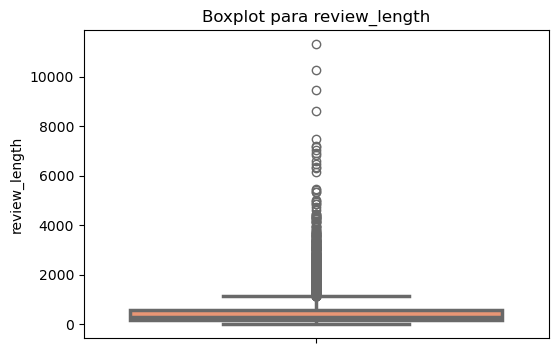

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar las columnas disponibles en el DataFrame
print("Columnas disponibles en el DataFrame:")
print(valoraciones.columns)

# Crear la columna 'review_length' si no existe, calculando la longitud de las reseñas
if 'review_length' not in valoraciones.columns:
    valoraciones['review_length'] = valoraciones['reviewText'].apply(len)
    print("\nColumna 'review_length' creada con la longitud de las reseñas.")

# Variable específica para el boxplot
variable_especifica = 'review_length'  # Cambia a otra columna si es necesario

# Verificar que la columna exista antes de graficar
if variable_especifica in valoraciones.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=variable_especifica, data=valoraciones, color=sns.color_palette("Set2")[1], linewidth=2.5)
    plt.title(f"Boxplot para {variable_especifica}")
    plt.ylabel(variable_especifica)
    plt.show()
else:
    print(f"\nLa columna '{variable_especifica}' no existe en el DataFrame.")


## Rango intercuartilico

Outliers encontrados por IQR en posiciones:
 [18, 184, 186, 190, 194, 200, 208, 216, 217, 226, 255, 256, 301, 351, 354, 355, 358, 362, 365, 367, 368, 369, 371, 373, 378, 386, 394, 401, 403, 404, 412, 416, 418, 419, 422, 430, 440, 447, 449, 456, 484, 506, 527, 538, 544, 554, 609, 614, 656, 701, 702, 703, 729, 739, 745, 796, 865, 887, 900, 925, 957, 962, 982, 998, 1060, 1062, 1064, 1067, 1069, 1116, 1122, 1127, 1155, 1201, 1258, 1286, 1358, 1364, 1380, 1402, 1413, 1422, 1424, 1426, 1431, 1455, 1468, 1474, 1483, 1493, 1524, 1531, 1552, 1558, 1560, 1642, 1681, 1707, 1755, 1756, 1780, 1795, 1807, 1809, 1811, 1812, 1815, 1819, 1825, 1826, 1875, 1882, 1883, 1884, 1885, 1887, 1908, 1944, 1947, 1952, 1953, 1957, 1966, 1973, 1975, 1989, 1994, 2004, 2018, 2019, 2020, 2023, 2024, 2028, 2033, 2039, 2068, 2095, 2103, 2112, 2160, 2189, 2191, 2214, 2218, 2263, 2265, 2291, 2296, 2303, 2328, 2369, 2403, 2410, 2443, 2448, 2451, 2535, 2578, 2616, 2617, 2620, 2622, 2624, 2626, 2627, 2649, 2668, 2685, 2689,

C:\Users\Ikasle\AppData\Local\Temp\ipykernel_10496\3906520222.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=valoraciones, y=variable, palette="Set2")


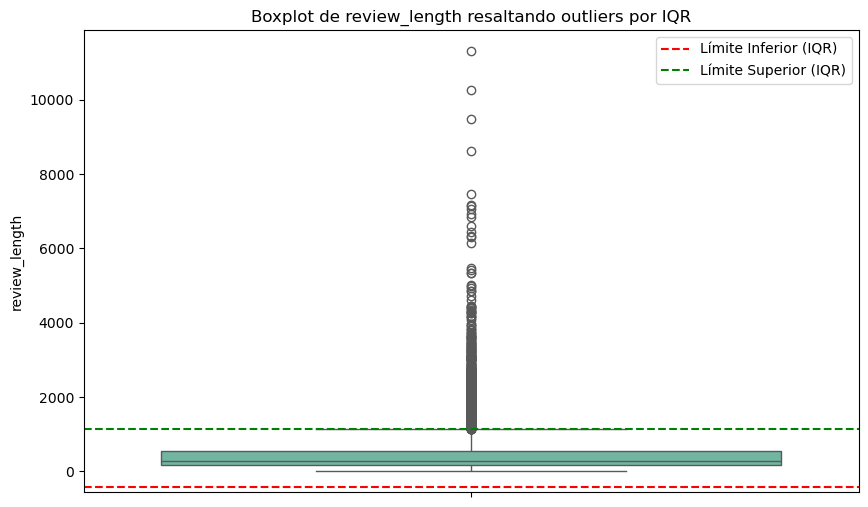

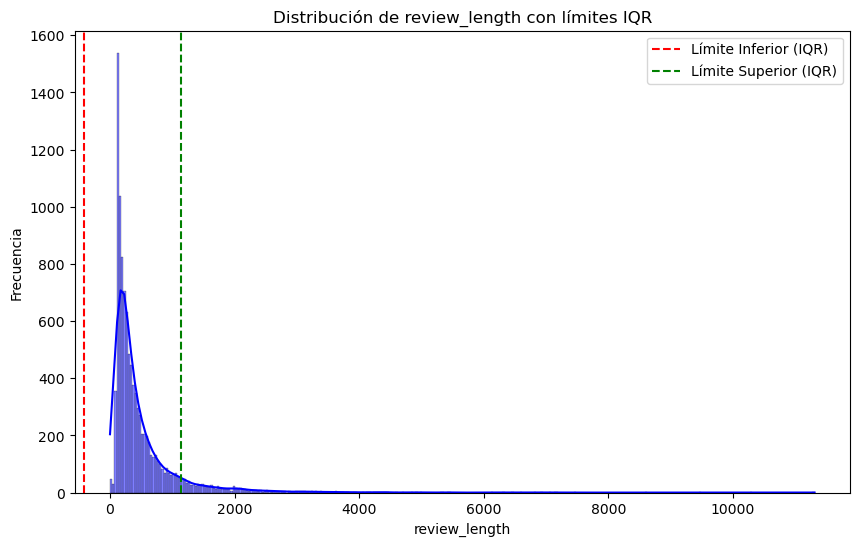

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Supongamos que `valoraciones` es tu dataset y 'review_length' es la variable a analizar
variable = 'review_length'

# Verificar si la columna existe
if variable not in valoraciones.columns:
    raise ValueError(f"La columna {variable} no existe en el dataset.")

# 1 - Rango Intercuartílico (IQR)
IQR = valoraciones[variable].quantile(0.75) - valoraciones[variable].quantile(0.25)
lower_whisker = valoraciones[variable].quantile(0.25) - (1.5 * IQR)
upper_whisker = valoraciones[variable].quantile(0.75) + (1.5 * IQR)

outlier_positions_IQR = [x for x in range(valoraciones.shape[0]) if valoraciones[variable].iloc[x] < lower_whisker or valoraciones[variable].iloc[x] > upper_whisker]

print("Outliers encontrados por IQR en posiciones:\n", outlier_positions_IQR)
print(f"Valores atípicos en {variable}:\n", valoraciones[variable].iloc[outlier_positions_IQR].values)

# Gráfico Boxplot para visualizar los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=valoraciones, y=variable, palette="Set2")
plt.title(f'Boxplot de {variable} resaltando outliers por IQR')
plt.axhline(lower_whisker, color='red', linestyle='--', label='Límite Inferior (IQR)')
plt.axhline(upper_whisker, color='green', linestyle='--', label='Límite Superior (IQR)')
plt.legend()
plt.show()

# Gráfico de densidad para observar la distribución
plt.figure(figsize=(10, 6))
sns.histplot(valoraciones[variable], kde=True, color='blue')
plt.axvline(lower_whisker, color='red', linestyle='--', label='Límite Inferior (IQR)')
plt.axvline(upper_whisker, color='green', linestyle='--', label='Límite Superior (IQR)')
plt.title(f'Distribución de {variable} con límites IQR')
plt.xlabel(variable)
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


## Desviación Típica


Outliers encontrados por Desviación Estándar:
 [186, 194, 208, 226, 351, 362, 365, 368, 371, 403, 412, 484, 544, 701, 957, 1155, 1364, 1524, 1558, 1809, 1815, 1883, 1884, 1887, 1966, 1973, 1975, 2018, 2019, 2068, 2095, 2191, 2403, 2649, 2668, 2905, 2921, 2940, 2942, 2963, 3097, 3613, 3758, 3771, 3782, 3880, 4189, 4222, 4254, 4311, 4445, 4454, 4531, 4574, 4653, 4708, 4745, 4906, 4949, 4955, 4982, 5010, 5056, 5118, 5210, 5237, 5244, 5306, 5581, 5593, 5600, 5606, 5630, 5631, 5638, 5707, 5736, 5738, 5813, 5821, 5973, 5984, 6189, 6194, 6385, 6411, 6416, 6417, 6461, 6554, 6576, 6587, 6604, 6612, 6645, 6652, 6654, 6690, 6758, 6917, 6918, 6923, 6928, 6935, 6982, 6996, 7064, 7190, 7201, 7205, 7267, 7287, 7293, 7297, 7405, 7427, 7438, 7483, 7489, 7504, 7556, 7576, 7695, 7699, 7742, 7743, 7873, 7874, 7877, 7922, 8065, 8068, 8084, 8086, 8296, 8424, 8426, 8429, 8475, 8477, 8481, 8484, 8493, 8494, 8500, 8544, 8631, 8632, 8636, 8667, 8710, 8713, 8733, 8782, 8787, 8812, 8931, 8939, 8943, 8956, 9100, 

<Figure size 1000x500 with 0 Axes>

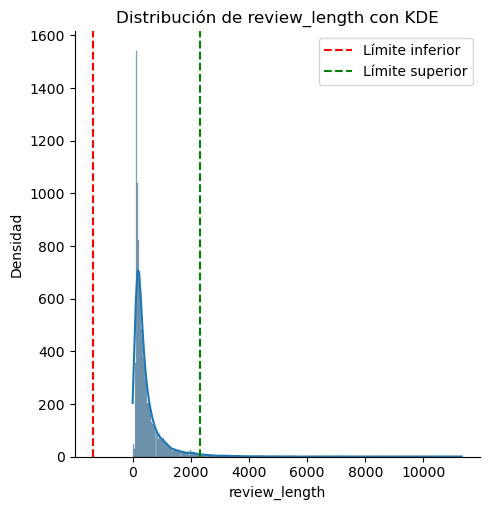

In [159]:
# 2 - Desviación Estándar
media = valoraciones[variable].mean()
desviacion = valoraciones[variable].std()
punto_corte_inferior = media - (3 * desviacion)
punto_corte_superior = media + (3 * desviacion)

outlier_positions_std = [x for x in range(valoraciones.shape[0]) if valoraciones[variable].iloc[x] < punto_corte_inferior or valoraciones[variable].iloc[x] > punto_corte_superior]

print("\nOutliers encontrados por Desviación Estándar:\n", outlier_positions_std)
print(f"Valores atípicos en {variable}:\n", valoraciones[variable].iloc[outlier_positions_std].values)

# Gráfico de densidad para Desviación Estándar
plt.figure(figsize=(10, 5))
sns.displot(valoraciones[variable], kde=True)
plt.title(f'Distribución de {variable} con KDE')
plt.xlabel(variable)
plt.ylabel('Densidad')
plt.axvline(punto_corte_inferior, color='r', linestyle='--', label='Límite inferior')
plt.axvline(punto_corte_superior, color='g', linestyle='--', label='Límite superior')
plt.legend()
plt.show()


## Z-Score 

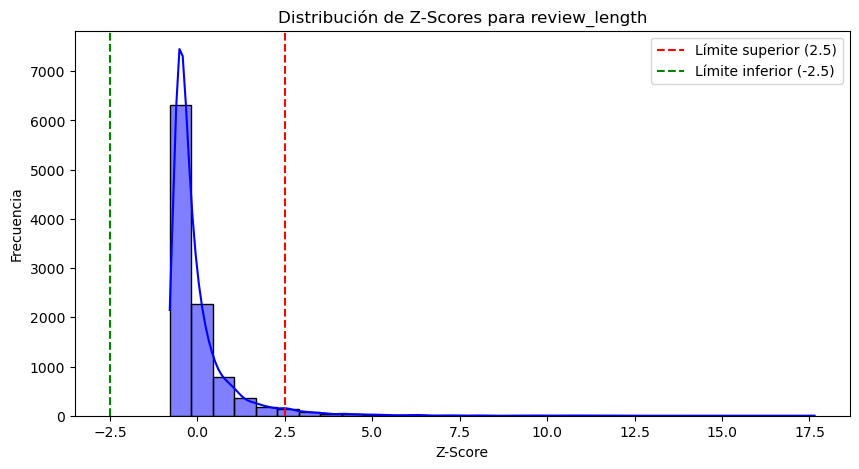


Outliers encontrados con Z-Score usando límite 3:
 [186, 194, 208, 226, 351, 362, 365, 368, 371, 403, 412, 484, 544, 701, 957, 1155, 1364, 1524, 1558, 1809, 1815, 1883, 1884, 1887, 1966, 1973, 1975, 2018, 2019, 2068, 2095, 2191, 2403, 2649, 2668, 2905, 2921, 2940, 2942, 2963, 3097, 3613, 3758, 3771, 3782, 3880, 4189, 4222, 4254, 4311, 4445, 4454, 4531, 4574, 4653, 4708, 4745, 4906, 4949, 4955, 4982, 5010, 5056, 5118, 5210, 5237, 5244, 5306, 5581, 5593, 5600, 5606, 5630, 5631, 5638, 5707, 5736, 5738, 5813, 5821, 5973, 5984, 6189, 6194, 6385, 6411, 6416, 6417, 6461, 6554, 6576, 6587, 6604, 6612, 6645, 6652, 6654, 6690, 6758, 6917, 6918, 6923, 6928, 6935, 6982, 6996, 7064, 7190, 7201, 7205, 7267, 7287, 7293, 7297, 7405, 7427, 7438, 7483, 7489, 7504, 7556, 7576, 7695, 7699, 7742, 7743, 7873, 7874, 7877, 7922, 8065, 8068, 8084, 8086, 8296, 8424, 8426, 8429, 8475, 8477, 8481, 8484, 8493, 8494, 8500, 8544, 8631, 8632, 8636, 8667, 8710, 8713, 8733, 8782, 8787, 8812, 8931, 8939, 8943, 8956, 91

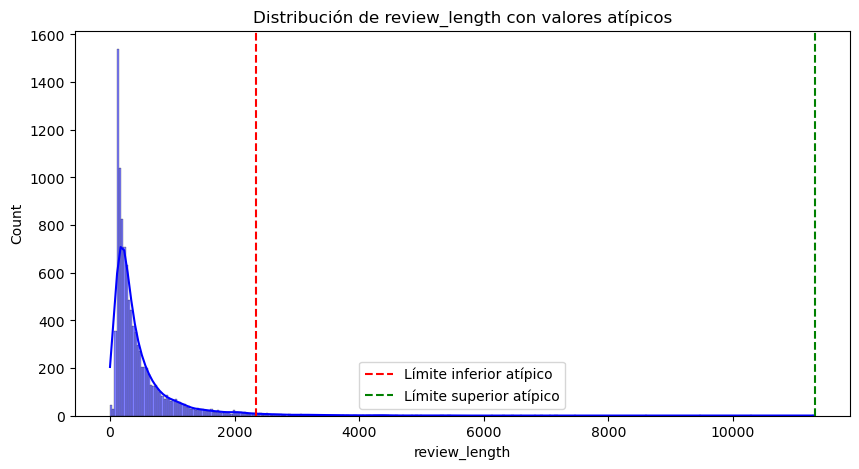

In [160]:
# Calcula los Z-Scores para la variable de interés
z_scores = zscore(valoraciones[variable])

# Visualización de la distribución de Z-Scores
plt.figure(figsize=(10, 5))
sns.histplot(z_scores, kde=True, bins=30, color='blue')
plt.title(f'Distribución de Z-Scores para {variable}')
plt.xlabel('Z-Score')
plt.ylabel('Frecuencia')
plt.axvline(x=2.5, color='r', linestyle='--', label='Límite superior (2.5)')
plt.axvline(x=-2.5, color='g', linestyle='--', label='Límite inferior (-2.5)')
plt.legend()
plt.show()

# Ajustar el límite y volver a calcular outliers
nuevo_limite = 3 # Ajusta aquí tu nuevo límite
outlier_positions_zscore = [x for x in range(valoraciones.shape[0]) if z_scores[x] < -nuevo_limite or z_scores[x] > nuevo_limite]

print(f"\nOutliers encontrados con Z-Score usando límite {nuevo_limite}:\n", outlier_positions_zscore)
print(f"Valores atípicos en {variable}:\n", valoraciones[variable].iloc[outlier_positions_zscore].values)

# Visualizar la distribución con nuevo límite
plt.figure(figsize=(10, 5))
sns.histplot(valoraciones[variable], kde=True, color='blue')
plt.title(f'Distribución de {variable} con valores atípicos')
plt.axvline(valoraciones[variable].iloc[outlier_positions_zscore].min(), color='r', linestyle='--', label='Límite inferior atípico')
plt.axvline(valoraciones[variable].iloc[outlier_positions_zscore].max(), color='g', linestyle='--', label='Límite superior atípico')
plt.legend()
plt.show()


## Reducción de la Dimensionalidad 
### PCA 

Dimensiones de X_numeric: (10261, 1)
Usando n_components = 1 para PCA.
PCA Tiempo de ejecución: 0.02 segundos


C:\Users\Ikasle\AppData\Local\Temp\ipykernel_10496\1150646161.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=pca_2d[:, 0], y=[0] * len(pca_2d), palette="Set2")


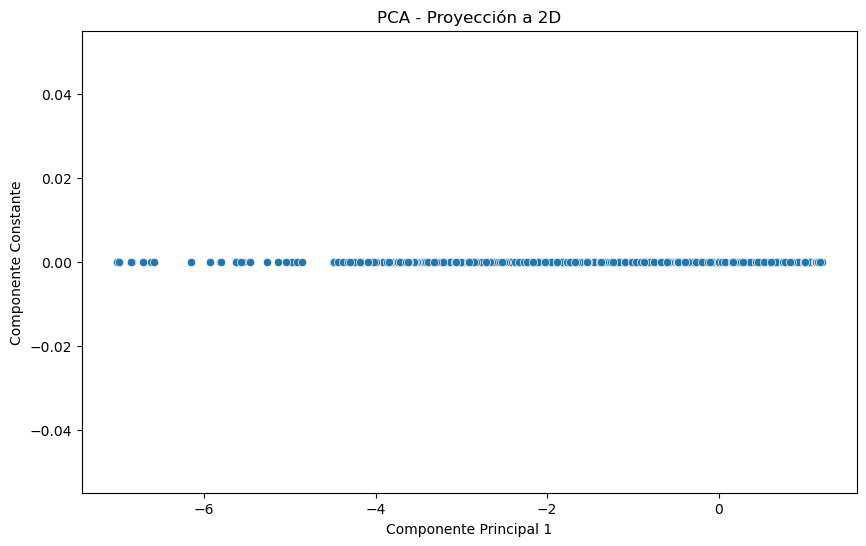

In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Verificar si X contiene solo datos numéricos
numeric_cols = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_cols]

# Verificar dimensiones
print(f"Dimensiones de X_numeric: {X_numeric.shape}")

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Ajustar dinámicamente el número de componentes
n_components = min(X_numeric.shape[0], X_numeric.shape[1], 2)
print(f"Usando n_components = {n_components} para PCA.")

# 1. PCA
start_time = time.time()
pca = PCA(n_components=n_components)
pca_2d = pca.fit_transform(X_scaled)
end_time = time.time()

print(f"PCA Tiempo de ejecución: {end_time - start_time:.2f} segundos")

# Gráfico PCA
plt.figure(figsize=(10, 6))
if n_components == 1:
    sns.scatterplot(x=pca_2d[:, 0], y=[0] * len(pca_2d), palette="Set2")
    plt.ylabel("Componente Constante")
else:
    sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], palette="Set2")
    plt.ylabel("Componente Principal 2")

plt.title("PCA - Proyección a 2D")
plt.xlabel("Componente Principal 1")
plt.show()


### t-SNE

Dimensiones de X_numeric: (10261, 1)
Aplicando t-SNE con 1 componente debido a la falta de características adicionales.


C:\Users\Ikasle\AppData\Local\Temp\ipykernel_10496\2574771989.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_1d[:, 0], y=[0] * len(tsne_1d), palette="Set2")


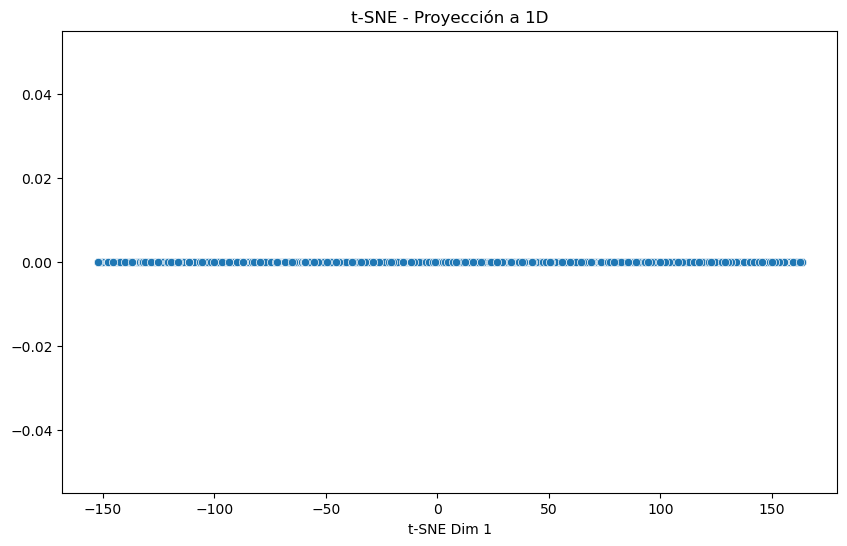

In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Verificar si X contiene solo datos numéricos
numeric_cols = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_cols]

# Verificar dimensiones
print(f"Dimensiones de X_numeric: {X_numeric.shape}")

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Aplicar t-SNE con 1 componente si hay menos de 2 características
if X_numeric.shape[1] < 2:
    print("Aplicando t-SNE con 1 componente debido a la falta de características adicionales.")
    tsne = TSNE(n_components=1, random_state=0, perplexity=30)
    tsne_1d = tsne.fit_transform(X_scaled)
    
    # Gráfico 1D
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=tsne_1d[:, 0], y=[0] * len(tsne_1d), palette="Set2")
    plt.title("t-SNE - Proyección a 1D")
    plt.xlabel("t-SNE Dim 1")
    plt.show()
else:
    # Aplicar t-SNE con 2 componentes
    tsne = TSNE(n_components=2, random_state=0, perplexity=30)
    tsne_2d = tsne.fit_transform(X_scaled)
    
    # Gráfico 2D
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=tsne_2d[:, 0], y=tsne_2d[:, 1], palette="Set2")
    plt.title("t-SNE - Proyección a 2D")
    plt.xlabel("t-SNE Dim 1")
    plt.ylabel("t-SNE Dim 2")
    plt.show()


## Normalizar y Estandarizar 

In [163]:
# Importamos las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer

# Simulación de datos de reseñas
valoraciones_sample = pd.DataFrame({
    'reviewText': ["Great product!", "Not bad", None, "Excellent service!", "Terrible experience"],
    'overall': [5, 4, 3, 5, 1]
})

# Eliminación de valores nulos
valoraciones_sample = valoraciones_sample.dropna(subset=['reviewText', 'overall'])

# Vectorización de texto con TF-IDF
tfidf = TfidfVectorizer(max_features=100)
X_text = tfidf.fit_transform(valoraciones_sample['reviewText']).toarray()

# Etiqueta objetivo
y = valoraciones_sample['overall']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predicciones
predictions = model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Precisión (accuracy):", accuracy)
print("Error absoluto medio (MAE):", mae)


Precisión (accuracy): 0.0
Error absoluto medio (MAE): 1.0
